# Sales training

In [16]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

## Get data

In [17]:
df = pd.DataFrame()

all_filenames = [file for file in os.listdir('./sales_data')]

for file in all_filenames:
    temp_df = pd.read_csv(r'./sales_data/' + file)
    df = pd.concat([df, temp_df])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Cleanup Data

In [18]:
df.dropna(inplace=True, how='all')

df = df[df['Order Date'].str[0:2] != 'Or']

df.reset_index()

df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Add a month column

In [19]:
df['Month'] = df['Order Date'].str[0:2].astype('int8')

df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


## add total price column

In [20]:
df['Total Price'] = df['Price Each'].astype('double') * df['Quantity Ordered'].astype('int32')

df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### which month was the best?

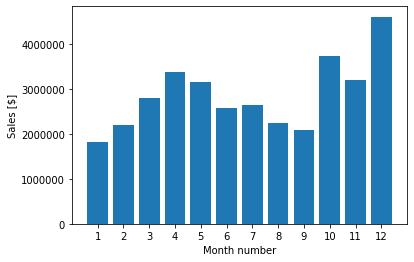

In [21]:
month_sales = df.groupby('Month')['Total Price'].sum()
months = range(1,13)

plt.bar(months, month_sales)
plt.xticks(months)
plt.ylabel('Sales [$]')
plt.xlabel('Month number')
plt.show()

### which city sold the most products?

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


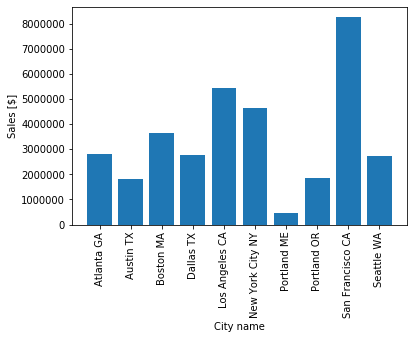

In [22]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip() + ' ' + x.split(',')[2].strip().split(' ')[0].strip())
#print("City, where most products were sold: " + str(df.groupby('City')))
cities = df.groupby('City', as_index=False)['Total Price'].sum()

plt.bar(cities['City'], cities['Total Price'])
plt.xticks(cities['City'], rotation='vertical')
plt.ylabel('Sales [$]')
plt.xlabel('City name')
plt.show()

### Question #3: What time should we display advertisements to maximize the likelihood of purchases?

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


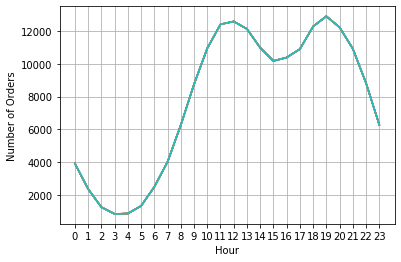

In [25]:
hours = [hour for hour, dtfrm in df.groupby('Hour')]

plt.plot(hours, df.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

Answer: Show ads at the peaks or right before the peaks

### Question #4: Which products are most often sold together?

In [26]:
df2 = df[df['Order ID'].duplicated(keep=False)]

temp_df = df2.groupby('Order ID')

new_column = temp_df['Product'].transform(lambda x: ','.join(x))
                                        
df2.insert(11, 'Grouped', new_column)

df2 = df2[['Order ID','Grouped']].drop_duplicates()

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key,value in (count.most_common(10)):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most and why?

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


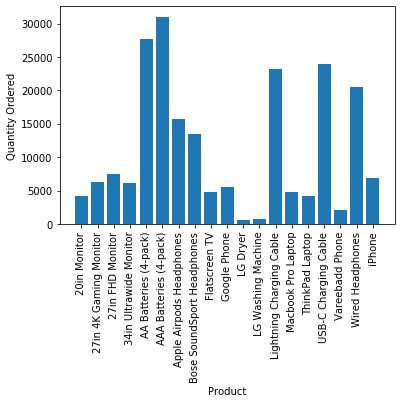

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


In [34]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32') 
df['Price Each'] = df['Price Each'].astype('float') 
product_group = df[['Product','Quantity Ordered']].groupby('Product').sum()
product_group.sort_index(inplace=True)

plt.bar(product_group.index, product_group['Quantity Ordered'])
plt.xticks(product_group.index, rotation='vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

product_group

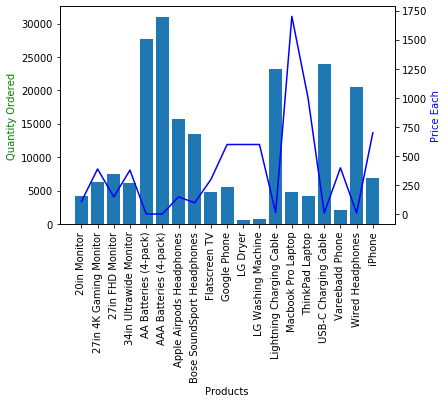

In [57]:
#should check for price variation before doing mean of it
prices = df.groupby('Product').mean()['Price Each']

prices.sort_index(inplace=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_group.index, product_group['Quantity Ordered'])
ax2.plot(product_group.index, prices.values, 'b-')

ax1.set_xlabel('Products')
ax1.set_xticklabels(product_group.index, rotation='vertical')#, size=8)
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()


### Question 6: which product providies the biggest income?

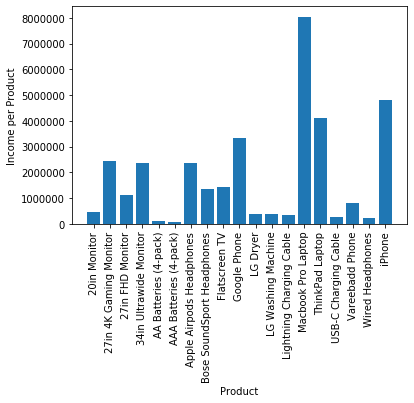

In [62]:
product_group['Income per Product'] = product_group['Quantity Ordered'].multiply(prices, axis='index')

plt.bar(product_group.index, product_group['Income per Product'])
plt.xticks(product_group.index, rotation='vertical')
plt.ylabel('Income per Product')
plt.xlabel('Product')
plt.show()